# Mathematical Underpinnings - Lab 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}((aX)^T(aX) - 2aXY - Y^TY) = a^2\mathbb{E}(X^TX) - 2a\mathbb{E}(XY) - \mathbb{E}(Y^TY) = a^2\mathbb{E}(X^TX) - 2a\mathbb{E}(X^TX) - 2a \mathbb{E}(\epsilon X) + \mathbb{E}(X^TX) + \mathbb{E}( \epsilon^2) =  a^2\mathbb{E}(X^TX) - 2a\mathbb{E}(X^TX) + \mathbb{E}(X^TX) + \sigma^2 = a^2 - 2a + 1 - \sigma^2 = (a-1)^2 + \sigma^2$


In our task we know $a^* = 1$.

In [3]:
def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps**2

### b)

In [4]:
X = np.random.normal(loc=0, scale=1, size=50)
eps = np.random.normal(loc=0, scale=1, size=50)

In [5]:
def calculate_empirical_risk(a, sigma, X=X, eps=eps):

    Y = X+eps

    risk = ((a*X - Y).T @ (a*X - Y)) / X.shape[0]

    return risk

In [10]:
calculate_empirical_risk(n=50, a=1, sigma=1)

0.7941460841693805

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

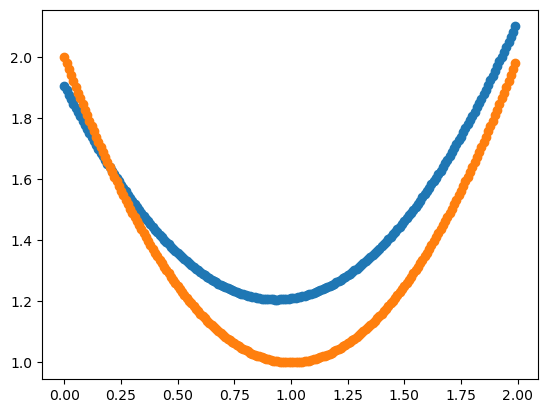

In [47]:
a = np.arange(0,2,0.01)
empirical_risks = [calculate_empirical_risk(a=a_curr, sigma=1) for a_curr in a]
population_risks = [population_risk(a_curr, 1) for a_curr in a]

plt.scatter(a, empirical_risks, label='empirical risk')
plt.scatter(a, population_risks, label='empirical risk')
plt.show()

In [48]:
empirical_risks_opt = minimize(lambda a: calculate_empirical_risk(a, sigma=1, X=X, eps=eps), x0=0)
population_risks_opt = minimize(lambda a: population_risk(a, sigma_eps=1), x0=0)

population_risk_at_emp_min = population_risk(a=empirical_risks_opt['x'], sigma_eps=1)

In [49]:
population_risks_opt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0
        x: [ 1.000e+00]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [50]:
empirical_risks_opt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.2062223904035094
        x: [ 9.344e-01]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 6.230e-01]]
     nfev: 6
     njev: 3

In [51]:
population_risk_at_emp_min

array([1.0043047])

In [58]:
excess_risk = population_risk_at_emp_min - population_risks_opt['fun']
excess_risk

array([0.0043047])

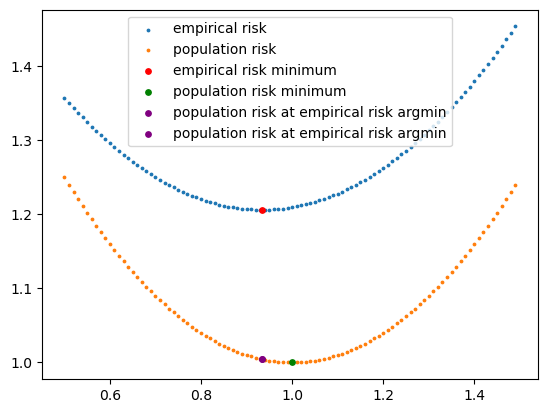

In [57]:
a = np.arange(0.5,1.5,0.01)
empirical_risks = [calculate_empirical_risk(a=a_curr, sigma=1) for a_curr in a]
population_risks = [population_risk(a_curr, 1) for a_curr in a]

plt.scatter(a, empirical_risks, label='empirical risk', s=3)
plt.scatter(a, population_risks, label='population risk', s=3)
plt.scatter(empirical_risks_opt['x'], empirical_risks_opt['fun'], label='empirical risk minimum', c='red', s=15) #ERM point
plt.scatter(population_risks_opt['x'], population_risks_opt['fun'], label='population risk minimum', c='green', s=15)
plt.scatter(empirical_risks_opt['x'], population_risk_at_emp_min, label='population risk at empirical risk argmin', c='purple', s=15)
plt.scatter(empirical_risks_opt['x'], population_risk_at_emp_min, label='population risk at empirical risk argmin', c='purple', s=15)

plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [6]:
def simulate_excess_risk(L=200, N=50):
    excess_risks = []

    for i in range(L):
        X = np.random.normal(loc=0, scale=1, size=N)
        eps = np.random.normal(loc=0, scale=1, size=N)

        empirical_risks_opt = minimize(lambda a: calculate_empirical_risk(a, sigma=1, X=X, eps=eps), x0=0)
        population_risks_opt = minimize(lambda a: population_risk(a, sigma_eps=1), x0=0)
        population_risk_at_emp_min = population_risk(a=empirical_risks_opt['x'], sigma_eps=1)

        excess_risks.append((population_risk_at_emp_min - population_risks_opt['fun'])[0])

    return excess_risks

In [7]:
excess_risks = simulate_excess_risk(L=200)
excess_risks_500 = simulate_excess_risk(L=200, N=500)

In [8]:
np.mean(excess_risks), np.median(excess_risks), np.quantile(excess_risks, 0.25), np.quantile(excess_risks, 0.75)

(0.020193252969752783,
 0.009944414424850168,
 0.0026138306290621194,
 0.02421023008800094)

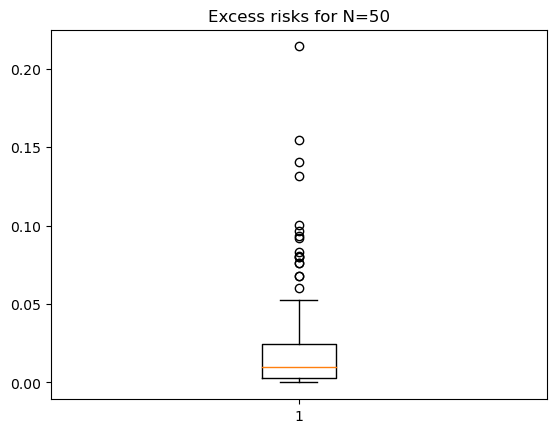

In [9]:
plt.boxplot(excess_risks)
plt.title('Excess risks for N=50')
plt.show()

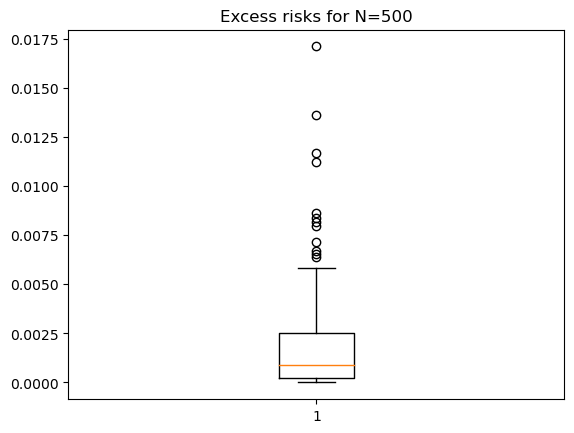

In [10]:
plt.boxplot(excess_risks_500)
plt.title('Excess risks for N=500')
plt.show()

In [11]:
excess_risks_smaples = []
for n_curr in range(10,500,10):
    excess_risks_curr = simulate_excess_risk(L=200, N=n_curr)
    excess_risks_smaples.append(np.mean(excess_risks_curr))

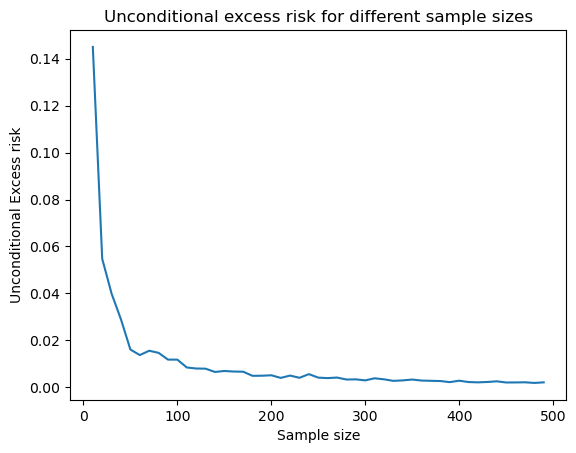

In [12]:
plt.plot(range(10,500,10), excess_risks_smaples)
plt.title('Unconditional excess risk for different sample sizes')
plt.xlabel('Sample size')
plt.ylabel('Unconditional Excess risk')
plt.show()